<a href="https://colab.research.google.com/github/wanichayaporn/Multivariate/blob/main/Chapter4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multidimensional Scaling

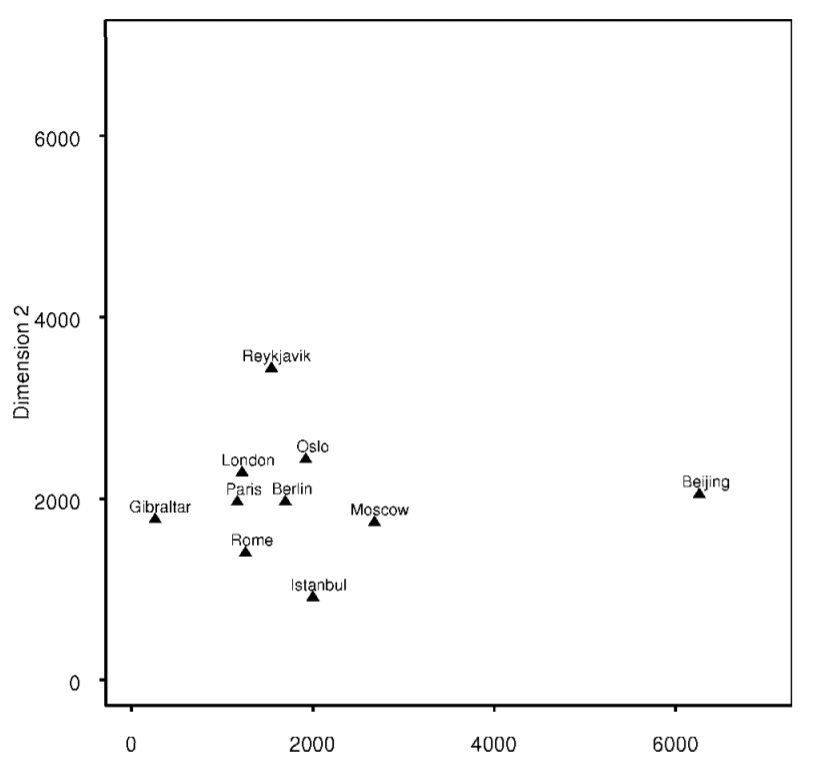

##Example on Iris dataset

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##ลอง plot PCA เพื่อเปรียบเทียบกับ MDS

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2)

In [5]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [6]:
from matplotlib import pyplot as plt

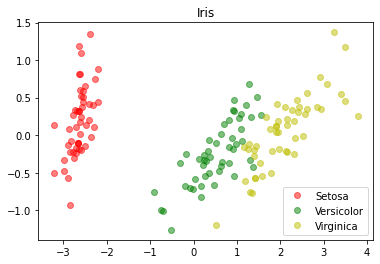

In [7]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',alpha=0.5,label = 'Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',alpha=0.5,label = 'Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',alpha=0.5,label = 'Virginica')
plt.legend()
plt.title('Iris');

#Plot MDS (Mutidimesional Scaling)

Distance ระยะห่าง

In [8]:
X1 = example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [9]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

คำนวณระยะห่างระหว่างจุดแบบ Euclidean distance

In [10]:
import numpy as np

In [11]:
dist = np.linalg.norm(X1-X2)
dist

0.5385164807134502

In [12]:
(0.04+0.25)**(1/2) ##คำนวณมือ

0.5385164807134504

In [13]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])  
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

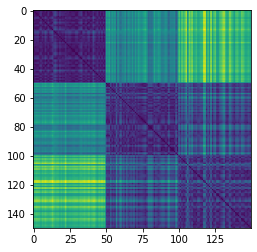

In [14]:
plt.imshow(dis_matrix)

นำ distances_matrix ที่ได้นำไปทำ MDS เพื่อลด Dimention ให้นำไป plot กราฟได้ดีขึ้น

In [15]:
from sklearn.manifold import MDS

In [16]:
mds = MDS(n_components=2)

In [17]:
new_msd = mds.fit_transform(example_df.iloc[:,:-1])

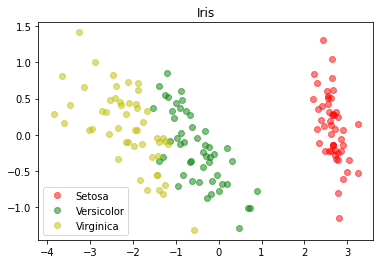

In [18]:
plt.plot(new_msd[:50,0],new_msd[:50,1],'or',alpha=0.5,label = 'Setosa')
plt.plot(new_msd[50:100,0],new_msd[50:100,1],'og',alpha=0.5,label = 'Versicolor')
plt.plot(new_msd[100:,0],new_msd[100:,1],'oy',alpha=0.5,label = 'Virginica')
plt.legend()
plt.title('Iris'); #ตั้งชื่อกราฟโดยใช้ .title

ลอง plot จุด 3 จุดเพื่อดูระยะห่างของจุดนั้นๆ

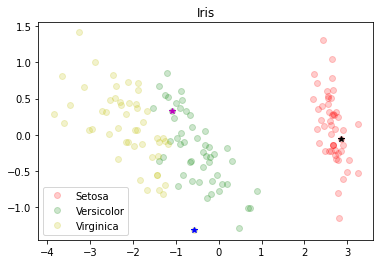

In [19]:
plt.plot(new_msd[:50,0],new_msd[:50,1],'or',alpha=0.2,label = 'Setosa')
plt.plot(new_msd[50:100,0],new_msd[50:100,1],'og',alpha=0.2,label = 'Versicolor')
plt.plot(new_msd[100:,0],new_msd[100:,1],'oy',alpha=0.2,label = 'Virginica')
plt.plot(new_msd[6,0],new_msd[6,1],'*k')
plt.plot(new_msd[56,0],new_msd[56,1],'*m')
plt.plot(new_msd[106,0],new_msd[106,1],'*b')
plt.legend()
plt.title('Iris'); 

##Pre-computed distance matrix

In [20]:
mds2 = MDS(n_components=2,dissimilarity='precomputed')

In [21]:
new_msd2 = mds.fit_transform(dis_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


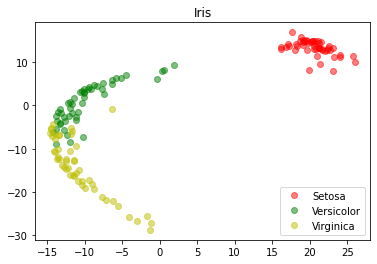

In [22]:
plt.plot(new_msd2[:50,0],new_msd2[:50,1],'or',alpha=0.5,label = 'Setosa')
plt.plot(new_msd2[50:100,0],new_msd2[50:100,1],'og',alpha=0.5,label = 'Versicolor')
plt.plot(new_msd2[100:,0],new_msd2[100:,1],'oy',alpha=0.5,label = 'Virginica')
plt.legend()
plt.title('Iris');

##Example2

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [24]:
def make_hello(N=1000, rseed=42): ##N =จำนวนจุด
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])] 
    ##จัดเรียงข้อมูล

In [25]:
X = make_hello(1000) 

In [26]:
X.shape ##1000=จุด , 2= x,y

(1000, 2)

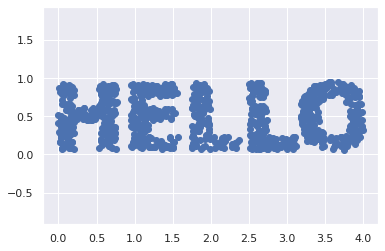

In [28]:
plt.scatter(X[:, 0], X[:, 1]) ##ยังไม่ใส่สี
plt.axis('equal'); ##ทำให้สเกลเท่ากัน


In [29]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

In [30]:
colorize['c'] .shape

(1000,)

In [31]:
colorize['cmap']

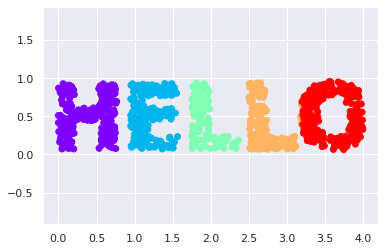

In [32]:
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [33]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

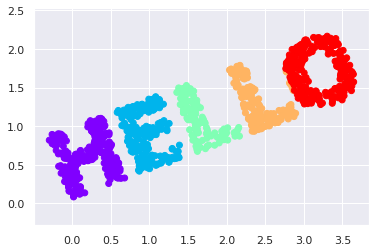

In [34]:
X2 = rotate(X, 20) 
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

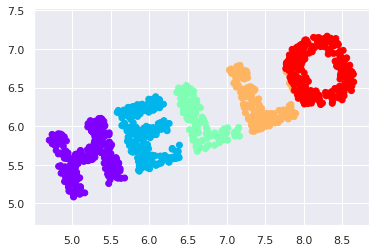

In [35]:
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

###MDS

In [36]:
from sklearn.metrics import pairwise_distances##ดูระยะห่างของจุดแต่ละจุด
D = pairwise_distances(X) 
D.shape

(1000, 1000)

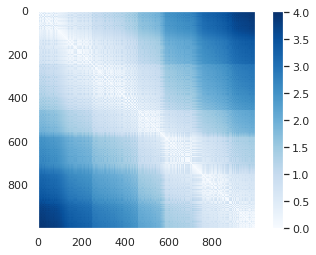

In [39]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [40]:
D2 = pairwise_distances(X2)

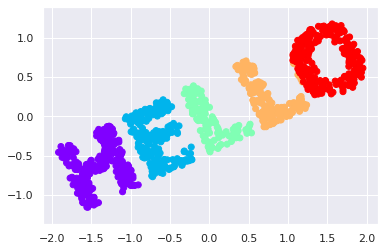

In [41]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

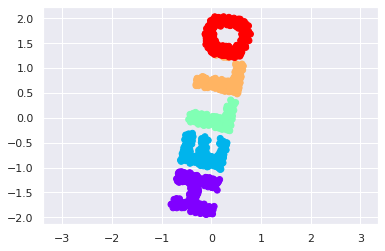

In [42]:
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

##Quiz 4 ทดลองทำ pca กับ ข้อมูล "X" แล้ว plotgrapt และดูผลว่าการกระจายของข้อมูลเปลี่ยนไปหรือไม่ อย่างไร

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)

In [54]:
new_pca2 = pca.fit_transform(X)

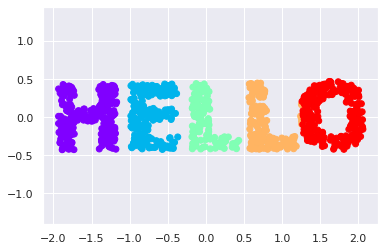

In [49]:
model = PCA(n_components=2)
out = model.fit_transform(X2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

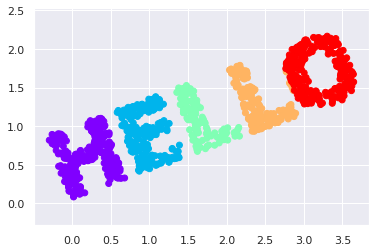

In [50]:
X2 = rotate(X, 20) 
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

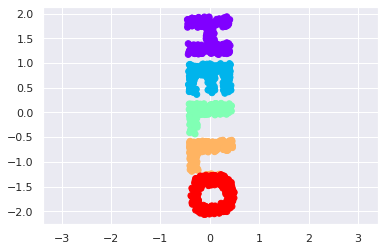

In [48]:
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

* random_state
* zorder in plt.imshow
* np.allclose()